In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
#using keras library
from keras.datasets import mnist
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam ,RMSprop
from keras.layers import Conv2D, MaxPooling2D
from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Dropout, Lambda, Flatten, Activation, Dropout

Using TensorFlow backend.


In [3]:
%matplotlib inline
np.random.seed(1337)

In [4]:
#loading mnist dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
x_train = x_train.reshape(x_train.shape[0], 784).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 784).astype('float32')
x_train /= 255
x_test /= 255

In [7]:
number_of_classes = 10
y_train.shape

(60000,)

In [8]:
y_train = to_categorical(y_train,number_of_classes)
y_test = to_categorical(y_test,number_of_classes)

In [9]:
y_test.shape

(10000, 10)

In [10]:
#model
model = Sequential()
model.add(Dense(784, input_shape = (784,)))
model.add(Activation('relu'))

model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(optimizer = 'adagrad', loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
classifier = model.fit(x_train, y_train, batch_size = 32, epochs = 10, verbose = True, validation_data = (x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 24s 394us/step - loss: 0.1980 - acc: 0.9428 - val_loss: 0.1098 - val_acc: 0.9667
Epoch 2/10
60000/60000 [==============================] - 24s 399us/step - loss: 0.0838 - acc: 0.9758 - val_loss: 0.0822 - val_acc: 0.9748
Epoch 3/10
60000/60000 [==============================] - 21s 348us/step - loss: 0.0582 - acc: 0.9832 - val_loss: 0.0719 - val_acc: 0.9772
Epoch 4/10
60000/60000 [==============================] - 26s 439us/step - loss: 0.0439 - acc: 0.9879 - val_loss: 0.0687 - val_acc: 0.9791
Epoch 5/10
60000/60000 [==============================] - 22s 360us/step - loss: 0.0342 - acc: 0.9911 - val_loss: 0.0608 - val_acc: 0.9813
Epoch 6/10
60000/60000 [==============================] - 21s 356us/step - loss: 0.0274 - acc: 0.9932 - val_loss: 0.0589 - val_acc: 0.9815
Epoch 7/10
60000/60000 [==============================] - 22s 361us/step - loss: 0.0220 - acc: 0.9950 - val_loss: 0.

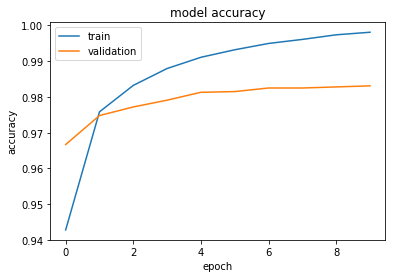

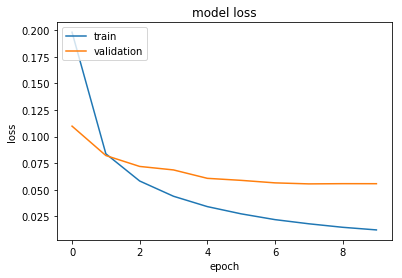

In [12]:

plt.plot(classifier.history['acc'])
plt.plot(classifier.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


plt.plot(classifier.history['loss'])
plt.plot(classifier.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()